# Predicción de demanda de alquileres sitycleta por países

### En este trabajo final del curso de Inteligencia Artificial y Big data que estamos trabajandom, vamos a realizar la predicion de numero de usuarios de "sitycleta" de la empresa de Sagulpa.

En este trabajo lo que se pretende llevar a cabo es la creacíon y manipulación de datos optenidos por la empresa Sagulpa en su paguina web 

### Aquí muestro todas las transforciones y modelos de entrenamiento que he utilizado para realizar el proyecto del

## Documentación

ID de cada Pais

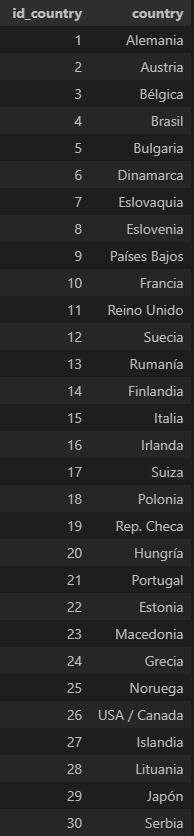

Nota: Regresion por paices saber cantidad de alquiler por paices, tranformar las estaciones de salida a numerico

# Inicio del Proyecto

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pickle

In [2]:
df_clima = pd.read_csv('data/time_df.csv', sep=';')
df_clima

,prec,presMax,presMin,racha,tmax,tmed,tmin,velmedia,moth,day
0,3.10,1015.70,1012.00,11.40,22.30,20.60,19.00,2.80,12,1
1,1.10,1012.90,1008.80,7.80,23.00,20.70,18.40,3.30,12,2
2,7.10,1009.70,1006.50,6.70,20.10,18.90,17.70,1.70,12,3
3,0.00,1007.70,1004.90,3.90,23.00,20.10,17.20,1.10,12,4
4,0.40,1015.00,1006.10,6.90,24.20,22.00,19.90,1.40,12,5
5,0.00,1015.10,1010.90,3.60,24.90,21.70,18.50,0.30,12,6
6,0.80,1010.90,1005.60,3.30,22.70,20.80,19.00,1.10,12,7
7,0.00,1010.00,1005.70,4.70,23.70,22.00,20.20,0.60,12,8
8,0.00,1015.20,1009.20,6.10,25.00,22.40,19.90,0.80,12,9
9,0.00,1017.30,1014.10,5.00,24.80,22.40,20.00,0.80,12,10


In [3]:
df_sagulpa = pd.read_csv('data/sagulpa_df.csv', sep=';')
df_sagulpa

,id_country,country,start_place,start_day,start_month,start_h,start_min,start_seg,end_day,end_month,end_h,end_min,end_seg,user_time
0,18,Polonia,Plazoleta de Farray,13,12,20,59,23,14,12,8,6,9,11:06:46
1,20,Hungría,C.C. El Muelle,2,12,12,51,2,2,12,21,54,10,09:03:08
2,14,Finlandia,Plaza de España (elect.),27,12,11,12,16,27,12,19,50,51,08:38:35
3,11,Reino Unido,Teatro Pérez Galdós,27,12,22,18,4,28,12,6,37,52,08:19:48
4,11,Reino Unido,Churruca,30,12,22,29,17,31,12,6,47,42,08:18:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,18,Polonia,San Telmo,28,12,14,37,34,28,12,14,38,28,00:00:54
4280,15,Italia,Plaza de la feria,13,12,11,46,49,13,12,11,47,38,00:00:49
4281,11,Reino Unido,Plazoleta de Farray,4,12,21,8,3,4,12,21,8,49,00:00:46
4282,14,Finlandia,Plaza de la feria,1,12,9,11,42,1,12,9,12,27,00:00:45


In [4]:
# Renombrar las columnas
nuevos_nombres = {' tmed': 'tmed', ' tmin': 'tmin', ' velmedia': 'velmedia'}
df_clima = df_clima.rename(columns=nuevos_nombres)

for index, row in df_sagulpa.iterrows():
    match = df_clima[(df_clima['day'] == row['start_day'])]
    if not match.empty:
        df_sagulpa.loc[index, 'prec'] = match.iloc[0]['prec']
        df_sagulpa.loc[index, 'presMax'] = match.iloc[0]['presMax']
        df_sagulpa.loc[index, 'presMin'] = match.iloc[0]['presMin']
        df_sagulpa.loc[index, 'tmax'] = match.iloc[0]['tmax']
        df_sagulpa.loc[index, 'tmed'] = match.iloc[0]['tmed']
        df_sagulpa.loc[index, 'tmin'] = match.iloc[0]['tmin']
        df_sagulpa.loc[index, 'velmedia'] = match.iloc[0]['velmedia']

## Eliminamos columnas para preparar el DF_final

In [5]:
colum_delete = ['start_month','start_min', 'start_h', 'start_seg', 'end_day', 'end_month', 'end_h', 'end_min', 'end_seg', 'user_time', 'country']
df_final = df_sagulpa.drop(columns=colum_delete)
df_final

,id_country,start_place,start_day,prec,presMax,presMin,tmax,tmed,tmin,velmedia
0,18,Plazoleta de Farray,13,0.00,1017.20,1015.00,25.00,22.20,19.40,1.10
1,20,C.C. El Muelle,2,1.10,1012.90,1008.80,23.00,20.70,18.40,3.30
2,14,Plaza de España (elect.),27,0.00,1019.70,1012.00,22.50,21.10,19.70,4.70
3,11,Teatro Pérez Galdós,27,0.00,1019.70,1012.00,22.50,21.10,19.70,4.70
4,11,Churruca,30,0.00,1022.10,1019.50,24.90,22.50,20.10,1.90
...,...,...,...,...,...,...,...,...,...,...
4279,18,San Telmo,28,0.00,1020.60,1018.10,23.20,21.80,20.50,1.10
4280,15,Plaza de la feria,13,0.00,1017.20,1015.00,25.00,22.20,19.40,1.10
4281,11,Plazoleta de Farray,4,0.00,1007.70,1004.90,23.00,20.10,17.20,1.10
4282,14,Plaza de la feria,1,3.10,1015.70,1012.00,22.30,20.60,19.00,2.80


In [6]:
# descargamos el df final de nuestro poryecto
df_final.to_csv('df_sagulpa.csv', index=False)

## Entrenamiento del modelo

### Primero vamos a separar los datos

En está parte del pro

In [7]:
# Contar el número de cogidas de bicicletas por base y dia
word = df_final.groupby(['start_place','start_day']).size().reset_index(name='catch_for_day')

# hacemos una muestra buscando por el nombre de una base
word[word['start_place'] == 'C.C. El Muelle']

,start_place,start_day,catch_for_day
83,C.C. El Muelle,1,3
84,C.C. El Muelle,2,5
85,C.C. El Muelle,3,1
86,C.C. El Muelle,4,5
87,C.C. El Muelle,5,6
88,C.C. El Muelle,6,6
89,C.C. El Muelle,7,4
90,C.C. El Muelle,8,5
91,C.C. El Muelle,10,7
92,C.C. El Muelle,11,12


In [8]:
# Realizar la fusión basada en la columna 'start_place' y 'start_day'
df_final = df_final.merge(word, on=['start_place', 'start_day'], how='left')

# Obtener los códigos numéricos y los valores únicos correspondientes
codes, unique_values = pd.factorize(df_final['start_place'])

# Agregar una nueva columna con los códigos numéricos
df_final['id_place'] = codes

In [9]:
# Creamos un nuevo DataFrame con los valores únicos de 'start_place' e 'id_place'
unique_values = df_final[['start_place', 'id_place']].drop_duplicates()
unique_values

,start_place,id_place
0,Plazoleta de Farray,0
1,C.C. El Muelle,1
2,Plaza de España (elect.),2
3,Teatro Pérez Galdós,3
4,Churruca,4
5,Parque del Estadio Insular,5
6,Base Naval,6
7,Parque Santa Catalina,7
15,Torre Las Palmas,8
16,Plaza de la feria,9


In [10]:
# eliminamos la columna string de nombres de base
df_final = df_final.drop('start_place', axis=1)

# renombrar el nombre de las columnas
df_final.rename(columns={'start_day': 'day'}, inplace=True)

# mostramos el df
df_final 

,id_country,day,prec,presMax,presMin,tmax,tmed,tmin,velmedia,catch_for_day,id_place
0,18,13,0.00,1017.20,1015.00,25.00,22.20,19.40,1.10,9,0
1,20,2,1.10,1012.90,1008.80,23.00,20.70,18.40,3.30,5,1
2,14,27,0.00,1019.70,1012.00,22.50,21.10,19.70,4.70,8,2
3,11,27,0.00,1019.70,1012.00,22.50,21.10,19.70,4.70,6,3
4,11,30,0.00,1022.10,1019.50,24.90,22.50,20.10,1.90,13,4
...,...,...,...,...,...,...,...,...,...,...,...
4279,18,28,0.00,1020.60,1018.10,23.20,21.80,20.50,1.10,16,15
4280,15,13,0.00,1017.20,1015.00,25.00,22.20,19.40,1.10,5,9
4281,11,4,0.00,1007.70,1004.90,23.00,20.10,17.20,1.10,13,0
4282,14,1,3.10,1015.70,1012.00,22.30,20.60,19.00,2.80,7,9


[Text(0.5, 0, 'id_country'),
 Text(1.5, 0, 'day'),
 Text(2.5, 0, 'prec'),
 Text(3.5, 0, 'presMax'),
 Text(4.5, 0, 'presMin'),
 Text(5.5, 0, 'tmax'),
 Text(6.5, 0, 'tmed'),
 Text(7.5, 0, 'tmin'),
 Text(8.5, 0, 'velmedia'),
 Text(9.5, 0, 'catch_for_day'),
 Text(10.5, 0, 'id_place')]

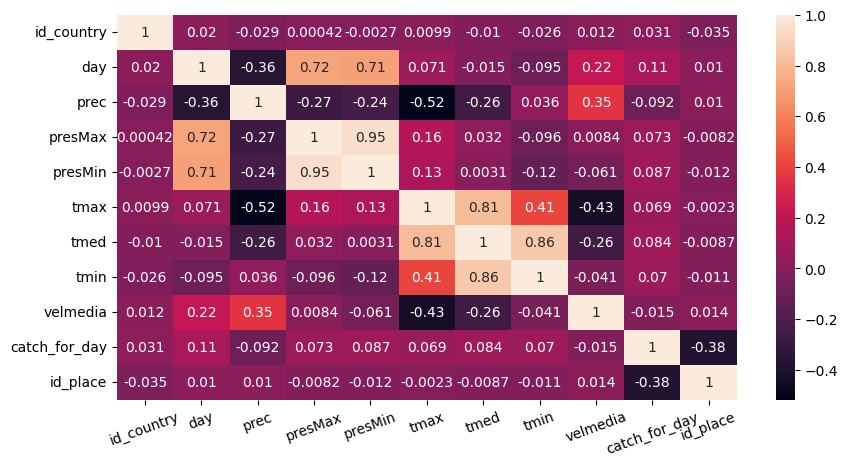

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.heatmap(df_final.corr(), annot=True)

# Ajustar las etiquetas del eje x en horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

## Dividimos los datos para el Entrenamiento

In [12]:
# Dividimos los datos de entrenamiento
X_Train  = df_final.drop(['catch_for_day'], axis=1)
Y_Train  = df_final['catch_for_day']

# train y test
x_train, x_test, y_train, y_test = train_test_split(X_Train, Y_Train, test_size=0.5, random_state=42)

### Segundo realizamos con el LazyPredict un estudio rapido sobre que modelos nos puede servir para el entrenamiento

In [13]:
# # Estandarización de características numéricas
# scaler = StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

# Inicialización de LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

# Entrenamiento y evaluación de los modelos
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

# Imprimir los modelos
models

100%|██████████| 42/42 [01:40<00:00,  2.40s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.91,0.91,1.13,0.32
XGBRegressor,0.90,0.90,1.20,0.08
RandomForestRegressor,0.90,0.90,1.24,0.55
ExtraTreeRegressor,0.88,0.88,1.35,0.01
BaggingRegressor,0.87,0.87,1.39,0.07
DecisionTreeRegressor,0.84,0.84,1.52,0.01
LGBMRegressor,0.81,0.81,1.66,0.04
HistGradientBoostingRegressor,0.81,0.81,1.68,0.32
GradientBoostingRegressor,0.61,0.62,2.39,0.14


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Min Value :0.8016906111402895 (9)


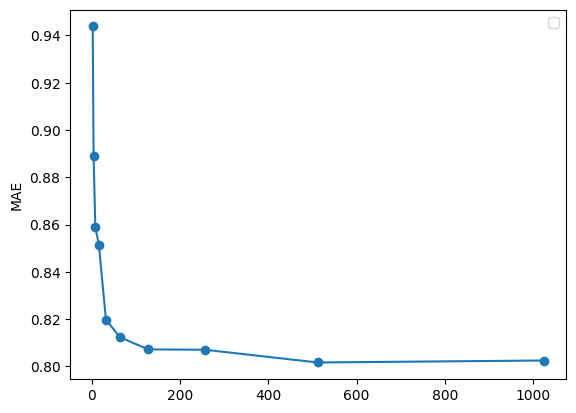

In [14]:
l_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

cv = TimeSeriesSplit(n_splits = 10)
X_Train.reset_index(drop=True,inplace=True)

total_scores = []
for estimators in l_estimators:
    fold_accuracy = []
    regressor = RandomForestRegressor(n_estimators= estimators, criterion='absolute_error')
    # verificar cada uno de los modelos con validación cruzada.
    for train_fold, test_fold in cv.split(X_Train):
      # División train test aleatoria
      f_train = X_Train.loc[train_fold]
      f_test = X_Train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit(x_train, y_train)
      Y_Pred = regressor.predict(x_test)
      # evaluación del modelo
      mae = mean_absolute_error(y_test,Y_Pred)
      fold_accuracy.append(mae)
    total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
plt.plot(l_estimators, total_scores, marker='o')
print ('Min Value :' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
    
plt.legend()
plt.show()

In [15]:
best_est = l_estimators[np.argmin(total_scores)]
best_mae = min(total_scores)
print ("Min Value (estimators = %i, MAE = %6.2f)"  % (best_est, best_mae))

Min Value (estimators = 512, MAE =   0.80)


In [16]:
# constructor
regressor =  RandomForestRegressor(n_estimators= best_est, criterion='absolute_error')

# fit and predict
for train_fold, test_fold in cv.split(X_Train):
  # División train test aleatoria
  f_train = X_Train.loc[train_fold]
  f_test = X_Train.loc[test_fold]
  # entrenamiento y ejecución del modelo
  regressor.fit(x_train,y_train)


Y_Pred = regressor.predict(x_test)

In [17]:
Y_Pred

array([6.50585938, 6.3359375 , 4.56542969, ..., 6.35546875, 5.61328125,
       4.375     ])

In [18]:
mae = mean_absolute_error(y_test, Y_Pred)
print ("MAE = %6.2f"% (mae))

MAE =   0.81


In [19]:
# Grabamos el modelo en el directorio
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(regressor, file)

In [20]:
# Cargamos el modelo
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

In [23]:
x_in = np.asarray([26,13,0.0,1017.2,1015,25,22,19.4,1.1,7]).reshape(1,-1)
predicts = model.predict(x_in)
predicts[0]

14.19921875